In [32]:
from numpy import array
from pickle import dump
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
names =  pd.read_csv('users.csv', error_bad_lines = False, encoding='latin-1')

In [3]:
names.head()

,author,n
0,Lee4an,46
1,Partypooper009,80
2,Jenna1021,41
3,ALMEHZA_02,1
4,Fakehashish,32


In [4]:
names = names.drop(['n'], axis=1)

In [5]:
data = names.iloc[0][0]
for i in range(1,1100):
    x = names.iloc[i][0]
    data = data + ' ' + x

In [6]:
del names

In [7]:
# organize into sequences of characters
length = 10
sequence = list()
for i in range(length, len(data)):
    # select sequence of tokens
    seq = data[i-length:i+1]
    # store
    sequence.append(seq)
print('Total Sequences: %d' % len(sequence))

Total Sequences: 13433


In [8]:
sequence

['Lee4an Part',
 'ee4an Party',
 'e4an Partyp',
 '4an Partypo',
 'an Partypoo',
 'n Partypoop',
 ' Partypoope',
 'Partypooper',
 'artypooper0',
 'rtypooper00',
 'typooper009',
 'ypooper009 ',
 'pooper009 J',
 'ooper009 Je',
 'oper009 Jen',
 'per009 Jenn',
 'er009 Jenna',
 'r009 Jenna1',
 '009 Jenna10',
 '09 Jenna102',
 '9 Jenna1021',
 ' Jenna1021 ',
 'Jenna1021 A',
 'enna1021 AL',
 'nna1021 ALM',
 'na1021 ALME',
 'a1021 ALMEH',
 '1021 ALMEHZ',
 '021 ALMEHZA',
 '21 ALMEHZA_',
 '1 ALMEHZA_0',
 ' ALMEHZA_02',
 'ALMEHZA_02 ',
 'LMEHZA_02 F',
 'MEHZA_02 Fa',
 'EHZA_02 Fak',
 'HZA_02 Fake',
 'ZA_02 Fakeh',
 'A_02 Fakeha',
 '_02 Fakehas',
 '02 Fakehash',
 '2 Fakehashi',
 ' Fakehashis',
 'Fakehashish',
 'akehashish ',
 'kehashish T',
 'ehashish Th',
 'hashish The',
 'ashish Thee',
 'shish Theee',
 'hish TheeeH',
 'ish TheeeHm',
 'sh TheeeHma',
 'h TheeeHman',
 ' TheeeHman ',
 'TheeeHman d',
 'heeeHman do',
 'eeeHman don',
 'eeHman dont',
 'eHman dontl',
 'Hman dontlo',
 'man dontloo',
 'an don

In [9]:
chars = sorted(list(set(data)))
mapping = dict((c, i) for i, c in enumerate(chars))

In [10]:
sequences = list()
for line in sequence:
    # integer encode line
    encoded_seq = [mapping[char] for char in line]
    # store
    sequences.append(encoded_seq)

In [11]:
del data
del sequence

In [12]:
sequences

[[23, 43, 43, 6, 39, 52, 0, 27, 39, 56, 58],
 [43, 43, 6, 39, 52, 0, 27, 39, 56, 58, 63],
 [43, 6, 39, 52, 0, 27, 39, 56, 58, 63, 54],
 [6, 39, 52, 0, 27, 39, 56, 58, 63, 54, 53],
 [39, 52, 0, 27, 39, 56, 58, 63, 54, 53, 53],
 [52, 0, 27, 39, 56, 58, 63, 54, 53, 53, 54],
 [0, 27, 39, 56, 58, 63, 54, 53, 53, 54, 43],
 [27, 39, 56, 58, 63, 54, 53, 53, 54, 43, 56],
 [39, 56, 58, 63, 54, 53, 53, 54, 43, 56, 2],
 [56, 58, 63, 54, 53, 53, 54, 43, 56, 2, 2],
 [58, 63, 54, 53, 53, 54, 43, 56, 2, 2, 11],
 [63, 54, 53, 53, 54, 43, 56, 2, 2, 11, 0],
 [54, 53, 53, 54, 43, 56, 2, 2, 11, 0, 21],
 [53, 53, 54, 43, 56, 2, 2, 11, 0, 21, 43],
 [53, 54, 43, 56, 2, 2, 11, 0, 21, 43, 52],
 [54, 43, 56, 2, 2, 11, 0, 21, 43, 52, 52],
 [43, 56, 2, 2, 11, 0, 21, 43, 52, 52, 39],
 [56, 2, 2, 11, 0, 21, 43, 52, 52, 39, 3],
 [2, 2, 11, 0, 21, 43, 52, 52, 39, 3, 2],
 [2, 11, 0, 21, 43, 52, 52, 39, 3, 2, 4],
 [11, 0, 21, 43, 52, 52, 39, 3, 2, 4, 3],
 [0, 21, 43, 52, 52, 39, 3, 2, 4, 3, 0],
 [21, 43, 52, 52, 39, 3, 

In [13]:
# vocabulary size
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 65


In [14]:
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]

In [15]:
sequences

array([[23, 43, 43, ..., 39, 56, 58],
       [43, 43,  6, ..., 56, 58, 63],
       [43,  6, 39, ..., 58, 63, 54],
       ...,
       [53, 52, 40, ..., 59, 50, 57],
       [52, 40, 43, ..., 50, 57, 43],
       [40, 43, 56, ..., 57, 43, 52]])

In [16]:
X[256]

array([44, 59, 57, 43, 42,  4, 10,  0, 18, 56])

In [17]:
y[110]

46

In [18]:
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = array(sequences)
y = to_categorical(y, num_classes=vocab_size)

In [19]:
X

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
#splitting data into train and test sets. 3/4 train, 1/4 test.
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=69)
del X
del y
del sequences

In [33]:
# define model
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 128)           99328     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 128)           131584    
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [34]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam')
# fit model
history = model.fit(x_train, y_train, epochs=50, batch_size=500, verbose=1,validation_data=(x_test, y_test))

Train on 10074 samples, validate on 3359 samples
Epoch 1/50
10074/10074 [==============================] - 2s 179us/step - loss: 3.9495 - val_loss: 3.6138
Epoch 2/50
10074/10074 [==============================] - 1s 78us/step - loss: 3.6335 - val_loss: 3.5696
Epoch 3/50
10074/10074 [==============================] - 1s 79us/step - loss: 3.6038 - val_loss: 3.5630
Epoch 4/50
10074/10074 [==============================] - 1s 81us/step - loss: 3.5887 - val_loss: 3.5627
Epoch 5/50
10074/10074 [==============================] - 1s 82us/step - loss: 3.5911 - val_loss: 3.5632
Epoch 6/50
10074/10074 [==============================] - 1s 82us/step - loss: 3.5823 - val_loss: 3.5725
Epoch 7/50
10074/10074 [==============================] - 1s 81us/step - loss: 3.5811 - val_loss: 3.5609
Epoch 8/50
10074/10074 [==============================] - 1s 82us/step - loss: 3.5740 - val_loss: 3.5519
Epoch 9/50
10074/10074 [==============================] - 1s 81us/step - loss: 3.5664 - val_loss: 3.5491
Epoch

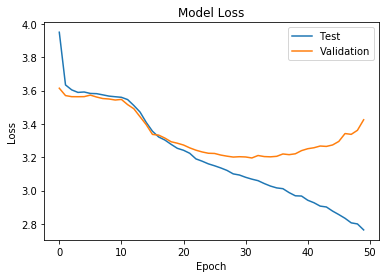

In [35]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [36]:
# save the model to file
model.save('char.h5')
# save the mapping
dump(mapping, open('mapping.pkl', 'wb'))

In [37]:
from pickle import load
from keras.models import load_model
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

# generate a sequence of characters with a language model
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
    result = ''
    in_text = seed_text
    # generate a fixed number of characters
    for _ in range(n_chars):
        # encode the characters as integers
        encoded = [mapping[char] for char in in_text]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # one hot encode
        encoded = to_categorical(encoded, num_classes=len(mapping))
        # predict character
        yhat = model.predict_classes(encoded, verbose=0)
        # reverse map integer to character
        out_char = ''
        for char, index in mapping.items():
            if index == yhat:
                out_char = char
                break
        # append to input
        in_text += char
        result += char
    return result

In [38]:
# load the model
model = load_model('char.h5')
# load the mapping
mapping = load(open('mapping.pkl', 'rb'))

In [39]:
import random
import string

#Generate random string as primer for char RNN

def randomString(stringLength):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(stringLength))

In [40]:
#result
for i in range(3):
    result = generate_seq(model, mapping, 10, randomString(10), 40).split()
    for username in result:
        print(username)

Domen
Snentarton
Shinlerton
Shonker
sle
an
Doneen
Donkann
Theslons
Shentore
Snen
oslon
soonen
sinertorether
ThetSSEheeled
